In [1]:
#import kagglehub

In [2]:
# Download latest version
#path = kagglehub.dataset_download("krishujeniya/heart-diseae")

#print("Path to dataset files:", path)

import pandas as pd
import numpy as np
import seabor as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report, roc_curve

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [4]:
df= pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape

(303, 14)

There are 303 rows and 14 coumns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# statistical analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Understanding

- Age – Age of the patient (in years).

- sex – Gender (1 = male, 0 = female).

- cp – Type of chest pain:

    0 = Typical angina (chest pain caused by heart stress)

    1 = Atypical angina (less common type of chest pain)

    2 = Non-anginal pain (pain not related to the heart)

    3 = Asymptomatic (no chest pain).

- trestbps – Resting blood pressure (in mm Hg).

- chol – Level of cholesterol in the blood (mg/dl).

- fbs – Fasting blood sugar above 120 mg/dl (1 = yes, 0 = no).

- restecg – Result of an electrocardiogram (ECG, heart electrical activity test):

    0 = Normal

    1 = Minor abnormality (ST-T wave change)

    2 = Possible heart muscle thickening.

- thalach – Maximum heart rate reached during exercise.

- exang – Whether exercise caused chest pain (1 = yes, 0 = no).

- oldpeak – Amount of change in the ECG after exercise (higher values can indicate heart problems).

- slope – Shape (slope) of the ECG line during exercise:

    0 = Upward

    1 = Flat

    2 = Downward.

- ca – Number of major blood vessels (0–3) seen in imaging tests.

- thal – Type of thalassemia (a blood disorder affecting oxygen transport):

    0 = Normal

    1 = Fixed defect (possible permanent issue)

    2 = Reversible defect (temporary issue).

- target – Whether the person has heart disease (1 = disease present, 0 = no disease).

In [22]:
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseAngina',
    'oldpeak': 'Oldpeak',
    'slope': 'ST_Slope',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'target': 'HeartDisease'
}, inplace=True)


In [23]:
df.dtypes

Age                   int64
Sex                category
ChestPainType      category
RestingBP             int64
Cholesterol           int64
FastingBS             int64
RestingECG         category
MaxHeartRate          int64
ExerciseAngina        int64
Oldpeak             float64
ST_Slope           category
NumMajorVessels       int64
Thalassemia        category
HeartDisease       category
dtype: object

In [24]:
df.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHeartRate       0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
NumMajorVessels    0
Thalassemia        0
HeartDisease       0
dtype: int64

There are no null values.

In [25]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 302, dtype: bool

In [26]:
df.duplicated().sum()

0

In [27]:
df.duplicated().value_counts()

False    302
Name: count, dtype: int64

There are:
- 302 unique rows
- 1 duplicate row

In [28]:
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHeartRate,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thalassemia,HeartDisease


In [29]:
# remove the duplicated row
df = df.drop_duplicates()

In [30]:
df.duplicated().sum()

0

- Dropped the duplicated row since it was just a single row.

#### Addressing Data types

- Categorical – A feature that represents groups or categories (not continuous numbers).
- Binary – A special type of categorical data that has only two categories (0/1, Yes/No, True/False).

Thus, the need to address data types of the following columns;cp, restecg, slope, thal,target and sex.

In [33]:
# changing data type of sex and target to binary/catgeory dtype
binary_cols= ['Sex','HeartDisease']
df[binary_cols]= df[binary_cols].astype('category')
# changing data types of cp, restecg, slope, thal to category
category_cols=['ChestPainType', 'RestingECG', 'ST_Slope', 'Thalassemia']
df[category_cols]= df[category_cols].astype('category')



In [34]:
# confirm the change of data types
df.dtypes


Age                   int64
Sex                category
ChestPainType      category
RestingBP             int64
Cholesterol           int64
FastingBS             int64
RestingECG         category
MaxHeartRate          int64
ExerciseAngina        int64
Oldpeak             float64
ST_Slope           category
NumMajorVessels       int64
Thalassemia        category
HeartDisease       category
dtype: object

### Outliers & Class Imbalance

In [35]:
#Check for class imbalance
df['HeartDisease'].value_counts(normalize=True) * 100

HeartDisease
1    54.304636
0    45.695364
Name: proportion, dtype: float64

The target variable (HeartDisease) is well balanced, with about 54% of patients having heart disease and 46% not having it. This balance ensures that the model can learn both classes effectively without needing resampling techniques.

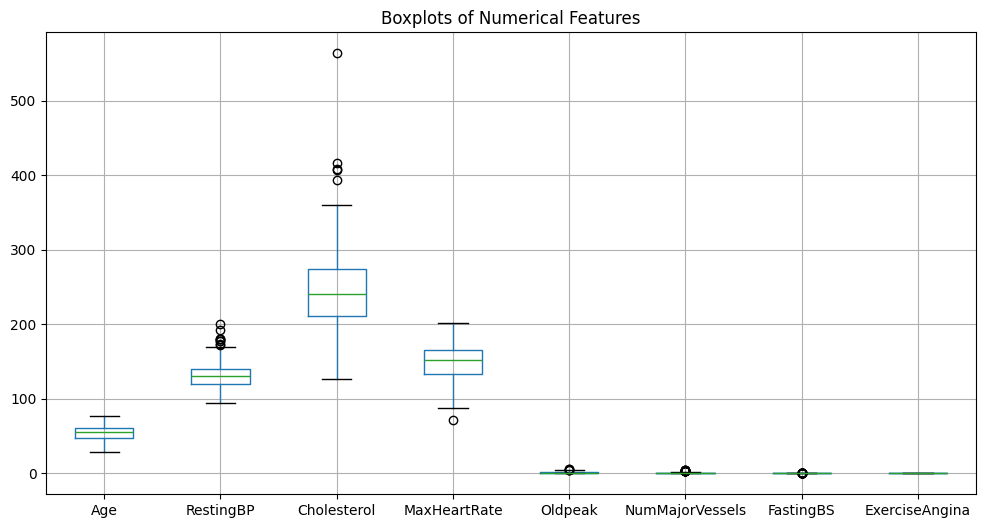

In [36]:
# check for outliers
numeric_cols = ['Age', 'RestingBP', 'Cholesterol','MaxHeartRate', 'Oldpeak', 'NumMajorVessels', 'FastingBS', 'ExerciseAngina']

plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numerical Features")
plt.show()


Therefore, considering the boxplot; 
- Cholesterol- has few high outliers above 400.

- RestingBP- has some high outliers up to 200.

- MaxHeartRate- has one low outlier near 70.

- Oldpeak- is mostly around 0 with few higher values up to 5.

- Age, NumMajorVessels, FastingBS, ExerciseAngina - distributions are compact with few or no outliers.


I'll keep all outliers because;

- High cholesterol (400-550): Indicates severe cardiovascular risk.
- High RestingBP (180-200): Stage 2-3 hypertension which is a strong heart disease predictor.
- Low MaxHeartRate (<90): May indicate cardiac dysfunction or poor cardiovascular fitness.

These aren't errors - they're critical diagnostic indicators

In [38]:
# using interquartile range to see each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
outliers


Age                 0
RestingBP           9
Cholesterol         5
MaxHeartRate        1
Oldpeak             5
NumMajorVessels    24
FastingBS          45
ExerciseAngina      0
dtype: int64

In [39]:
df['FastingBS'].value_counts()

FastingBS
0    257
1     45
Name: count, dtype: int64

In [40]:
df['NumMajorVessels'].value_counts()

NumMajorVessels
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64

IQR assumes continuous, normally-distributed data. It fails for:
- Binary variables (two values only)
- Categorical variables (discrete levels)
- Count data (0, 1, 2, 3...)

### Distribution Analysis

#### Univariate Distributions (Individual Features)

<Axes: xlabel='Age', ylabel='Count'>

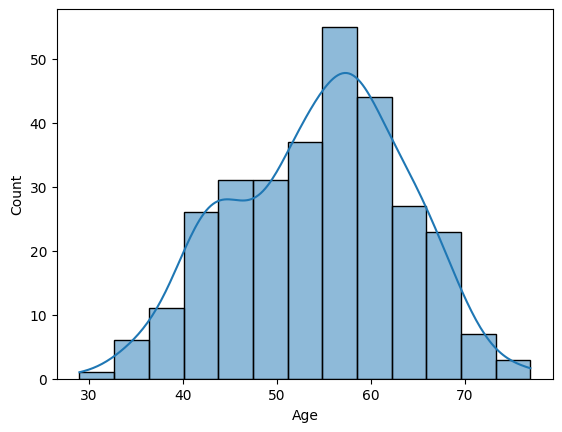

In [45]:
sns.histplot(df['Age'], kde=True)

In [51]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHeartRate,ExerciseAngina,Oldpeak,ST_Slope,NumMajorVessels,Thalassemia,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='Sex', ylabel='count'>

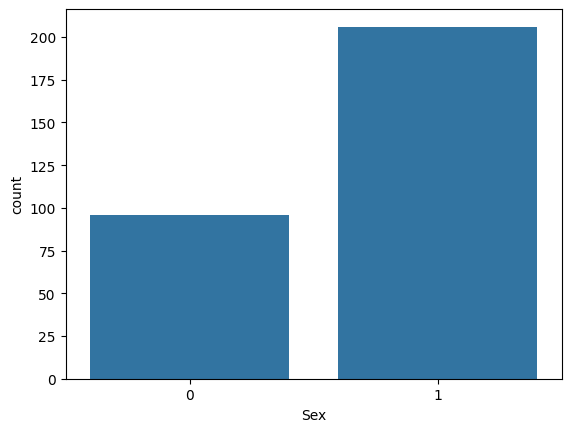

In [52]:
sns.countplot(data=df, x= 'Sex')